In [1]:
import pandas as pd

data = pd.read_csv('Complete 2023-2024_Premier_League_Player_Stats_and_Wages.csv')

# first position listed for each player
data['Pos'] = data['Pos'].apply(lambda x: x.split(',')[0])

In [2]:
import pandas as pd

data = pd.read_csv('Complete 2023-2024_Premier_League_Player_Stats_and_Wages.csv')

# Clean numeric fields that might contain commas
data['Total Min'] = data['Total Min'].str.replace(',', '').astype(float)

# Performance Index (PI) based on position
def calculate_performance_index(row):
    if 'FW' in row['Pos'].split(','):
        return (row['Goals'] * 6 + row['Ast'] * 3 + row['xG+/-90'] * 2 + row['Progressive Passes'] * 2)
    elif 'MF' in row['Pos'].split(','):
        return (row['Goals'] * 5 + row['Ast'] * 4 + row['Progressive Passes'] * 3 + row['Recov'] * 2 + row['TklW'] * 2 + row['xG+/-90'] * 2)
    elif 'DF' in row['Pos'].split(','):
        return (row['TklW'] * 3 + row['Int'] * 3 + row['Progressive Passes'] * 2 + row['Aerials Won'] * 2 + row['xG+/-90'] * 2)
    else:
        return 0
data['PI'] = data.apply(calculate_performance_index, axis=1)
# new DataFrame with added PI column
print(data[['Player', 'Pos', 'PI']])

                  Player    Pos       PI
0             Max Aarons     DF   166.88
1     Bénie Adama Traore  FW,MF    14.08
2            Tyler Adams     MF    33.48
3       Tosin Adarabioyo     DF   343.94
4         Elijah Adebayo     FW    91.40
..                   ...    ...      ...
550       Nicolò Zaniolo  FW,MF    71.60
551        Anass Zaroury  FW,MF     2.72
552  Oleksandr Zinchenko     DF   642.62
553           Kurt Zouma     DF   315.08
554      Martin Ødegaard     MF  1228.54

[555 rows x 3 columns]


In [3]:
data['+/-'] = pd.to_numeric(data['+/-'], errors='coerce')
data['On-Off'] = pd.to_numeric(data['On-Off'], errors='coerce')
data['xG+/-'] = pd.to_numeric(data['xG+/-'], errors='coerce')

# Calculate Win Contribution (WC)
data['WC'] = (
    data['+/-'] * 2 +             # Double weight as it directly affects game outcome
    data['On-Off'] * 1.5 +        # Significant but less so than actual goal difference
    data['xG+/-'] * 1 +           # Reflects expected impact
    (data['Goals'] + data['Ast']) * 3  # Direct scoring contributions
)

# new DataFrame with added WC column
print(data[['Player', 'Pos', 'PI', 'WC']])

                  Player    Pos       PI       WC
0             Max Aarons     DF   166.88  -55.665
1     Bénie Adama Traore  FW,MF    14.08  -31.810
2            Tyler Adams     MF    33.48    7.945
3       Tosin Adarabioyo     DF   343.94   12.400
4         Elijah Adebayo     FW    91.40   18.525
..                   ...    ...      ...      ...
550       Nicolò Zaniolo  FW,MF    71.60   11.825
551        Anass Zaroury  FW,MF     2.72   -5.490
552  Oleksandr Zinchenko     DF   642.62   76.010
553           Kurt Zouma     DF   315.08  -13.140
554      Martin Ødegaard     MF  1228.54  191.615

[555 rows x 4 columns]


In [4]:
# Analyzing players with the highest performance indices and  win contributions
top_performers = data.sort_values(by='PI', ascending=False)[['Player', 'Pos', 'Squad', 'PI']].head(10)
top_contributors = data.sort_values(by='WC', ascending=False)[['Player', 'Pos', 'Squad', 'WC']].head(10)

# Displaying the top performers and contributors
print("Top Performers by Player Performance Index:")
print(top_performers)
print("\nTop Contributors by Win Contribution:")
print(top_contributors)

Top Performers by Player Performance Index:
                  Player    Pos            Squad       PI
440                Rodri     MF  Manchester City  1475.58
431          Declan Rice     MF          Arsenal  1229.52
554      Martin Ødegaard     MF          Arsenal  1228.54
210          Pascal Groß  MF,DF         Brighton  1203.06
212      Bruno Guimarães     MF    Newcastle Utd  1197.56
304  Alexis Mac Allister     MF        Liverpool  1029.06
301         Douglas Luiz     MF      Aston Villa   961.48
100        Ryan Christie     MF      Bournemouth   952.00
189      Conor Gallagher     MF          Chelsea   943.02
178       Enzo Fernández     MF          Chelsea   926.34

Top Contributors by Win Contribution:
              Player    Pos            Squad       WC
448      Bukayo Saka     FW          Arsenal  201.225
554  Martin Ødegaard     MF          Arsenal  191.615
20    Julián Álvarez  MF,FW  Manchester City  181.550
222      Kai Havertz  MF,FW          Arsenal  176.910
431      

In [5]:
top_10_performers = {pos: data[data['Pos'] == pos].nlargest(10, 'PI')[['Player', 'Pos', 'Squad', 'PI']] for pos in ['DF', 'MF', 'FW']}
top_10_contributors = {pos: data[data['Pos'] == pos].nlargest(10, 'WC')[['Player', 'Pos', 'Squad', 'WC']] for pos in ['DF', 'MF', 'FW']}

# Printing the results for each main position
for pos in ['DF', 'MF', 'FW']:
    print(f"Top 10 Players by Performance Index (PI) for {pos}:")
    print(top_10_performers[pos])
    print("\nTop 10 Players by Win Contribution (WC) for {pos}:")
    print(top_10_contributors[pos])
    print("\n--------------------------------\n")

Top 10 Players by Performance Index (PI) for DF:
                  Player Pos           Squad      PI
514      Virgil van Dijk  DF       Liverpool  767.14
486      James Tarkowski  DF         Everton  758.94
438     Antonee Robinson  DF          Fulham  697.40
444      Cristian Romero  DF       Tottenham  650.84
552  Oleksandr Zinchenko  DF         Arsenal  642.62
23      Joachim Andersen  DF  Crystal Palace  612.56
223   Jan Paul van Hecke  DF        Brighton  592.12
415          Pedro Porro  DF       Tottenham  571.20
511       Destiny Udogie  DF       Tottenham  564.44
399     Emerson Palmieri  DF        West Ham  563.94

Top 10 Players by Win Contribution (WC) for {pos}:
                     Player Pos            Squad       WC
535               Ben White  DF          Arsenal  157.970
307       Gabriel Magalhães  DF          Arsenal  141.000
514         Virgil van Dijk  DF        Liverpool  111.135
525             Kyle Walker  DF  Manchester City  106.020
274            Jakub Kiwio

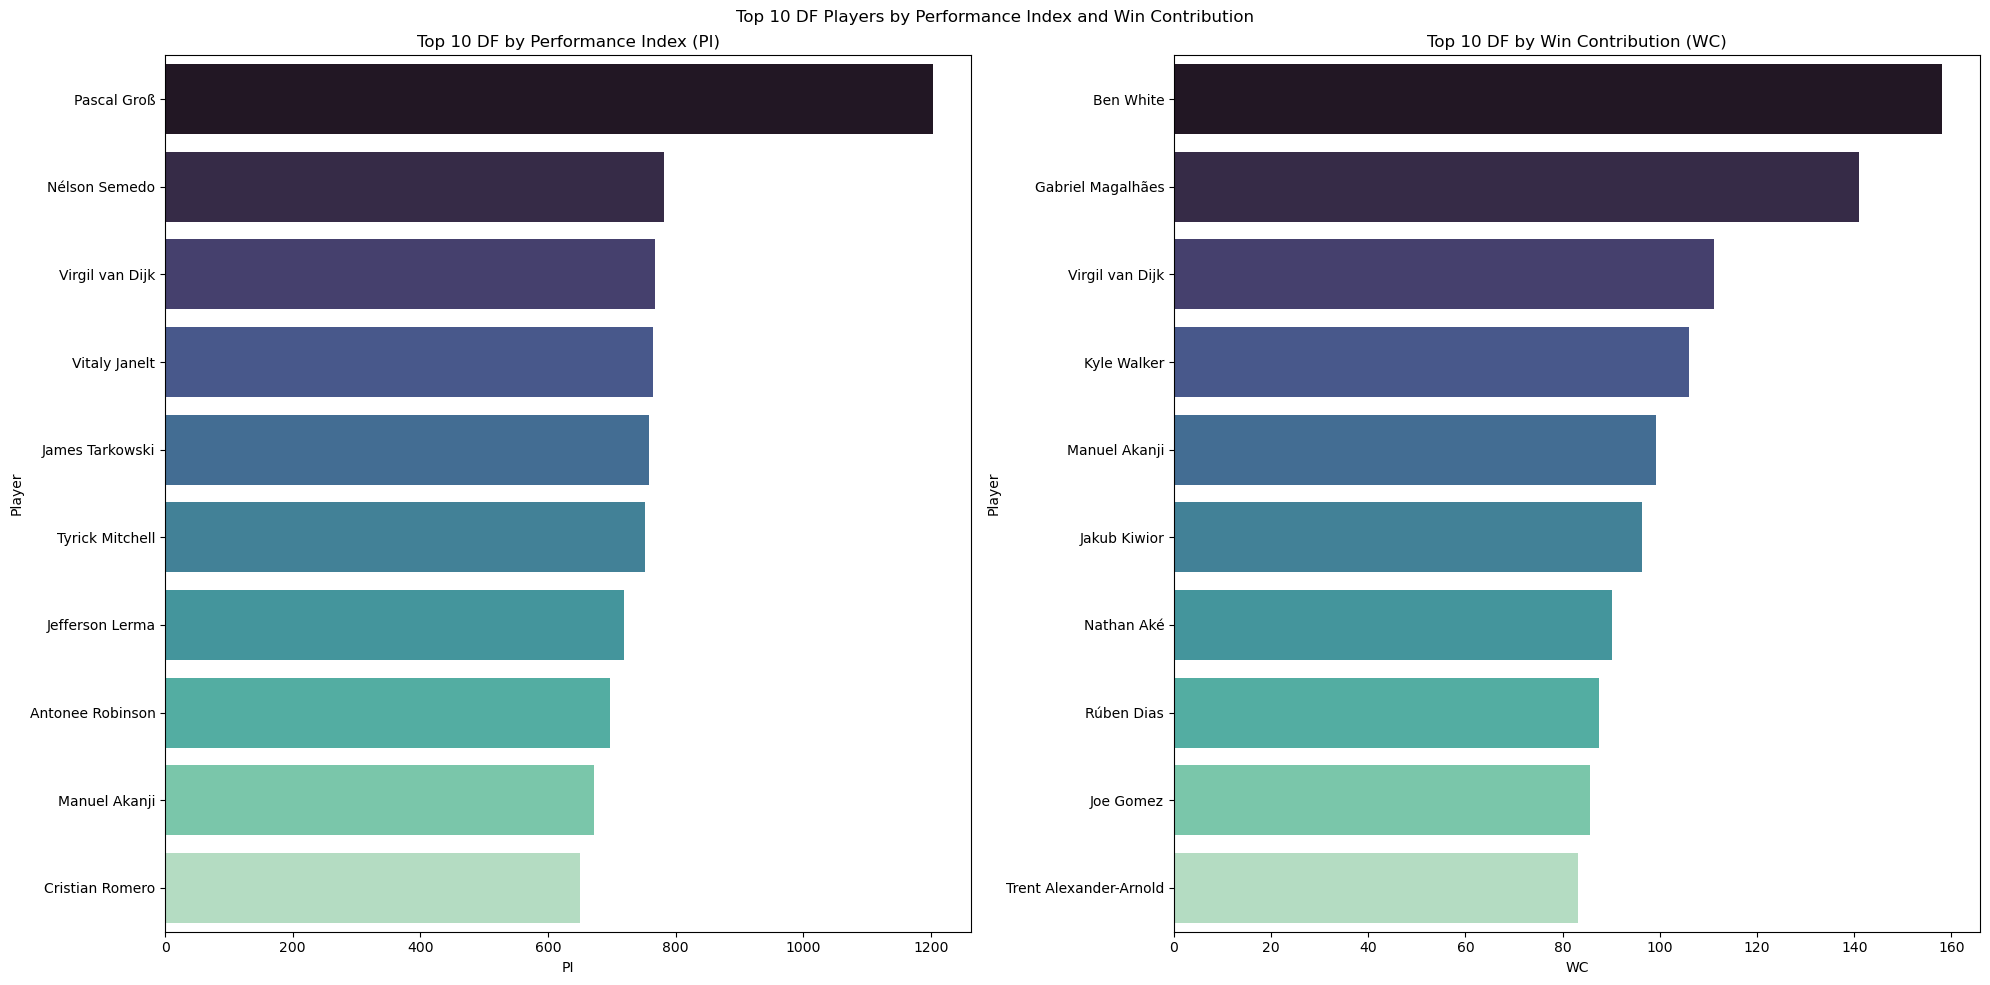

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns



# Define the function to calculate Performance Index (PI) based on position
def calculate_performance_index(row):
    if 'FW' in row['Pos'].split(','):
        return (row['Goals'] * 6 + row['Ast'] * 3 + row['xG+/-90'] * 2 + row['Progressive Passes'] * 2)
    elif 'MF' in row['Pos'].split(','):
        return (row['Goals'] * 5 + row['Ast'] * 4 + row['Progressive Passes'] * 3 + row['Recov'] * 2 + row['TklW'] * 2 + row['xG+/-90'] * 2)
    elif 'DF' in row['Pos'].split(','):
        return (row['TklW'] * 3 + row['Int'] * 3 + row['Progressive Passes'] * 2 + row['Aerials Won'] * 2 + row['xG+/-90'] * 2)
    else:
        return 0

# Calculate Performance Index
data['PI'] = data.apply(calculate_performance_index, axis=1)

# Calculate Win Contribution
data['WC'] = (
    data['+/-'] * 2 +
    data['On-Off'] * 1.5 +
    data['xG+/-'] * 1 +
    (data['Goals'] + data['Ast']) * 3
)

# Function to plot top 10 DF players by PI and WC
def plot_top_10_df_pi_wc(df):
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # Set figure size for better visibility

    # Metrics and titles for the plots
    metrics = ['PI', 'WC']
    titles = ['Performance Index (PI)', 'Win Contribution (WC)']

    # Filter for DF players only
    df_subset = df[df['Pos'].apply(lambda x: 'DF' in x.split(','))]

    for i, metric in enumerate(metrics):
        top_10 = df_subset.nlargest(10, metric)
        sns.barplot(x=metric, y='Player', data=top_10, ax=axes[i], palette="mako")
        axes[i].set_title(f'Top 10 DF by {titles[i]}')
        axes[i].set_xlabel(metric)
        axes[i].set_ylabel('Player')
    
    plt.suptitle('Top 10 DF Players by Performance Index and Win Contribution')
    plt.tight_layout()
    plt.show()

# Call the function to plot the visualizations
plot_top_10_df_pi_wc(data)

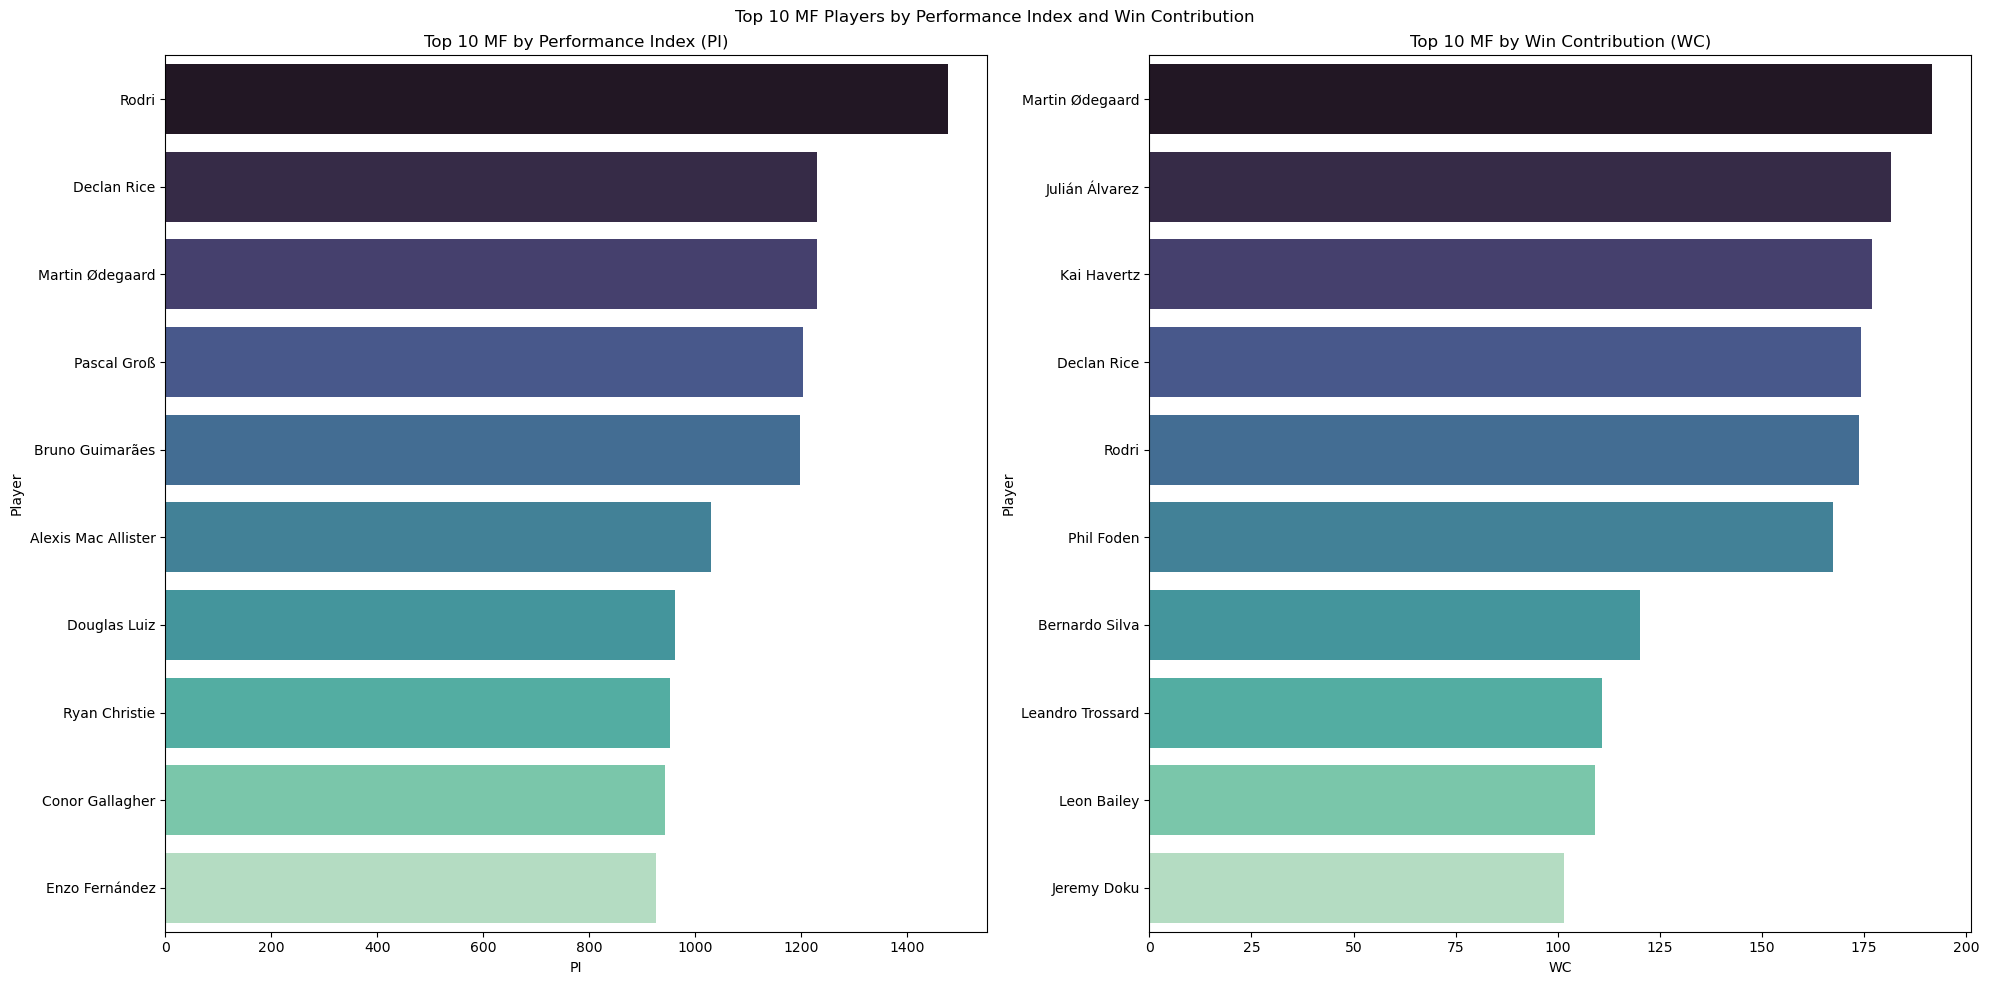

In [7]:
# Function to plot top 10 MF players by PI and WC
def plot_top_10_mf_pi_wc(df):
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # Set figure size for better visibility

    
    metrics = ['PI', 'WC']
    titles = ['Performance Index (PI)', 'Win Contribution (WC)']

    # Filter for DF players only
    df_subset = df[df['Pos'].apply(lambda x: 'MF' in x.split(','))]

    for i, metric in enumerate(metrics):
        top_10 = df_subset.nlargest(10, metric)
        sns.barplot(x=metric, y='Player', data=top_10, ax=axes[i], palette="mako")
        axes[i].set_title(f'Top 10 MF by {titles[i]}')
        axes[i].set_xlabel(metric)
        axes[i].set_ylabel('Player')
    
    plt.suptitle('Top 10 MF Players by Performance Index and Win Contribution')
    plt.tight_layout()
    plt.show()

# function to plot the visualizations
plot_top_10_mf_pi_wc(data)

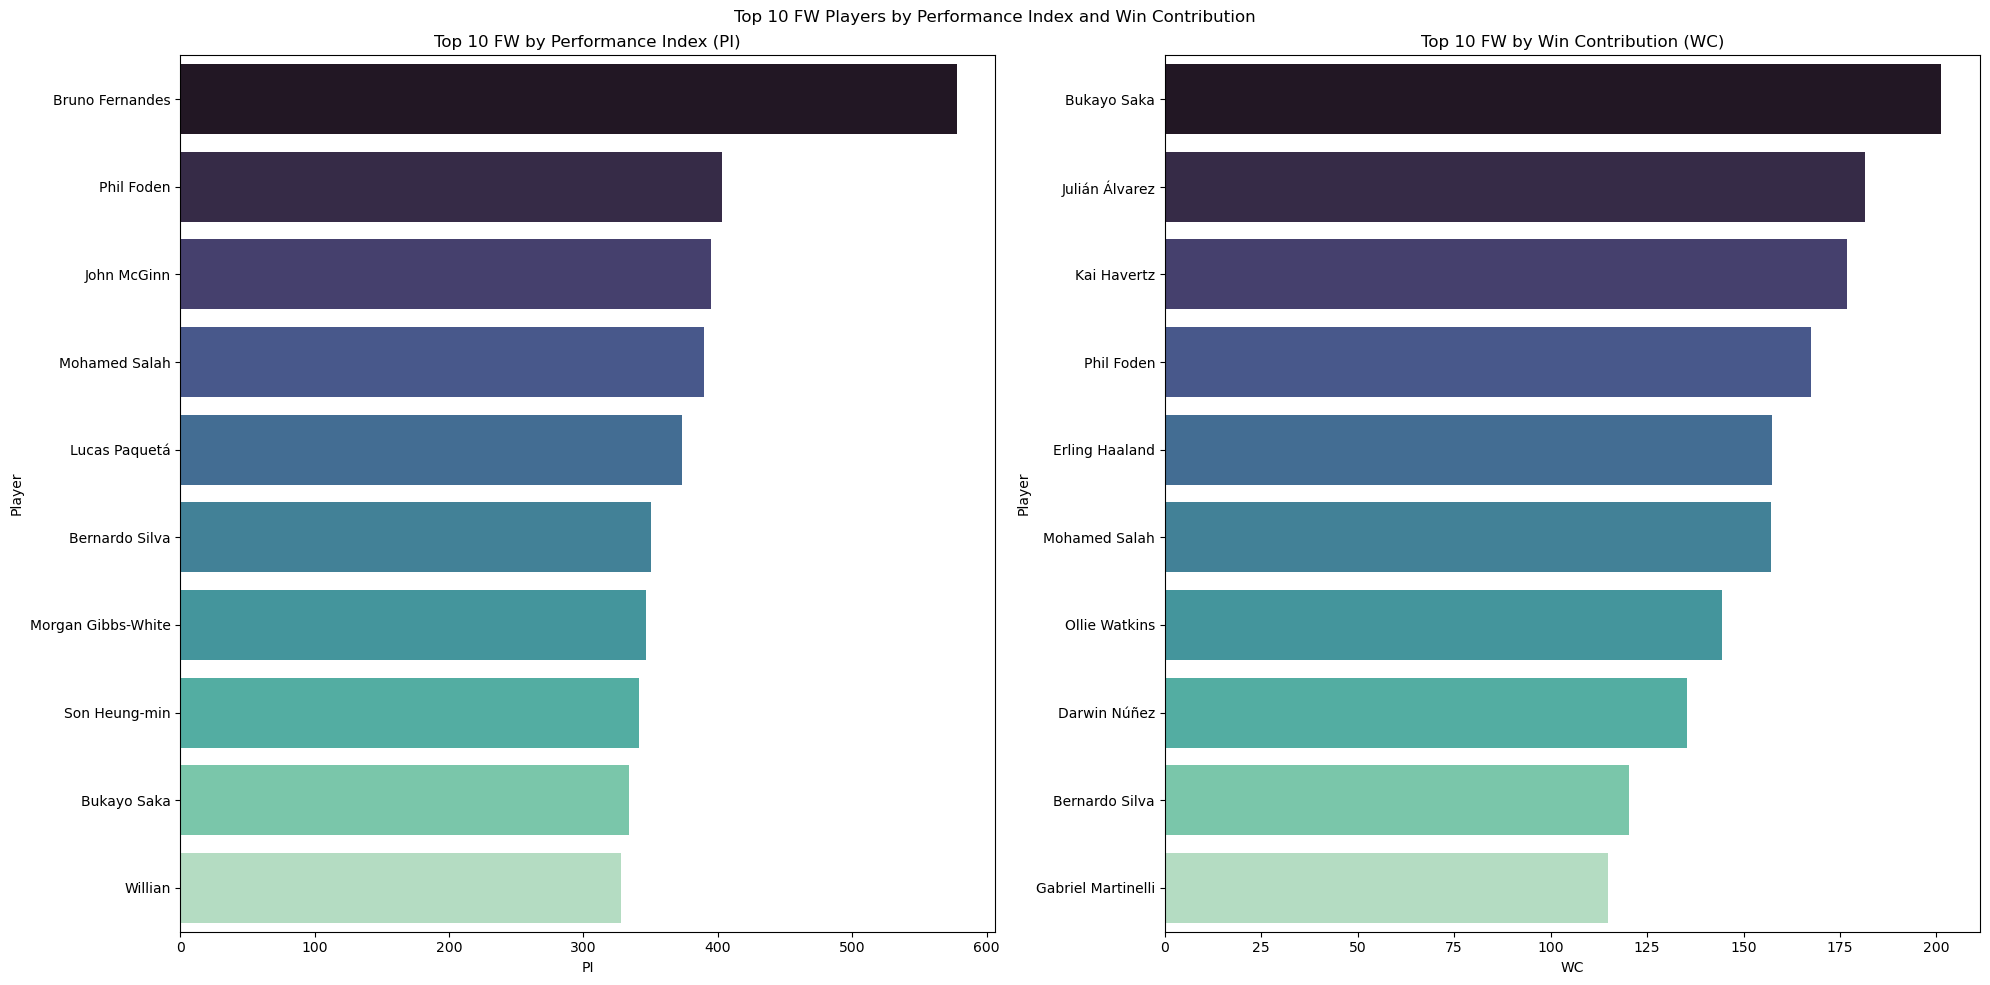

In [8]:
# Function to plot top 10 DF players by PI and WC
def plot_top_10_fw_pi_wc(df):
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # Set figure size for better visibility

   
    metrics = ['PI', 'WC']
    titles = ['Performance Index (PI)', 'Win Contribution (WC)']

    # Filter for DF players only
    df_subset = df[df['Pos'].apply(lambda x: 'FW' in x.split(','))]

    for i, metric in enumerate(metrics):
        top_10 = df_subset.nlargest(10, metric)
        sns.barplot(x=metric, y='Player', data=top_10, ax=axes[i], palette="mako")
        axes[i].set_title(f'Top 10 FW by {titles[i]}')
        axes[i].set_xlabel(metric)
        axes[i].set_ylabel('Player')
    
    plt.suptitle('Top 10 FW Players by Performance Index and Win Contribution')
    plt.tight_layout()
    plt.show()

# function to plot the visualizations
plot_top_10_fw_pi_wc(data)

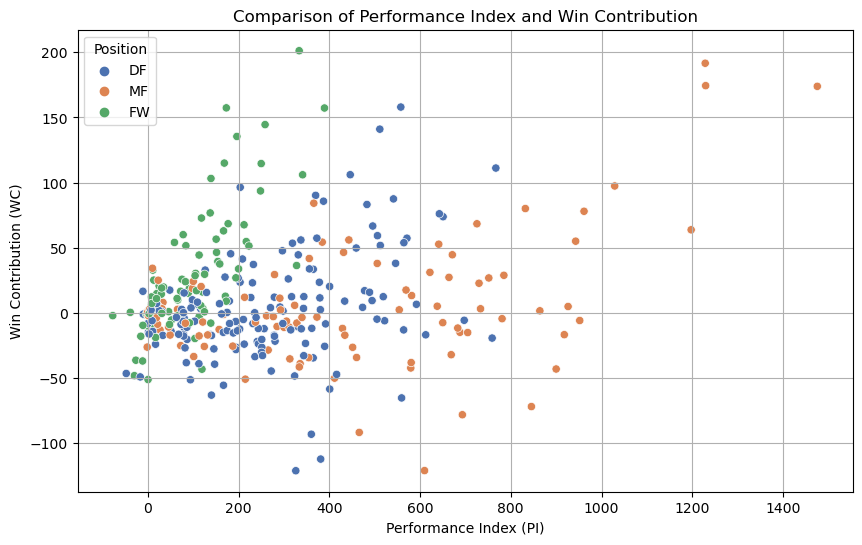

In [9]:
# Visualization 3: Scatter Plot for PI and WC Comparison
plt.figure(figsize=(10, 6))

# Filter data for the main positions only
main_positions_data = data[data['Pos'].isin(['DF', 'MF', 'FW'])]

# Plot the scatter plot for PI and WC only for main positions
sns.scatterplot(x='PI', y='WC', hue='Pos', data=main_positions_data, palette="deep")
plt.title('Comparison of Performance Index and Win Contribution')
plt.xlabel('Performance Index (PI)')
plt.ylabel('Win Contribution (WC)')
plt.legend(title='Position')
plt.grid(True)
plt.show()

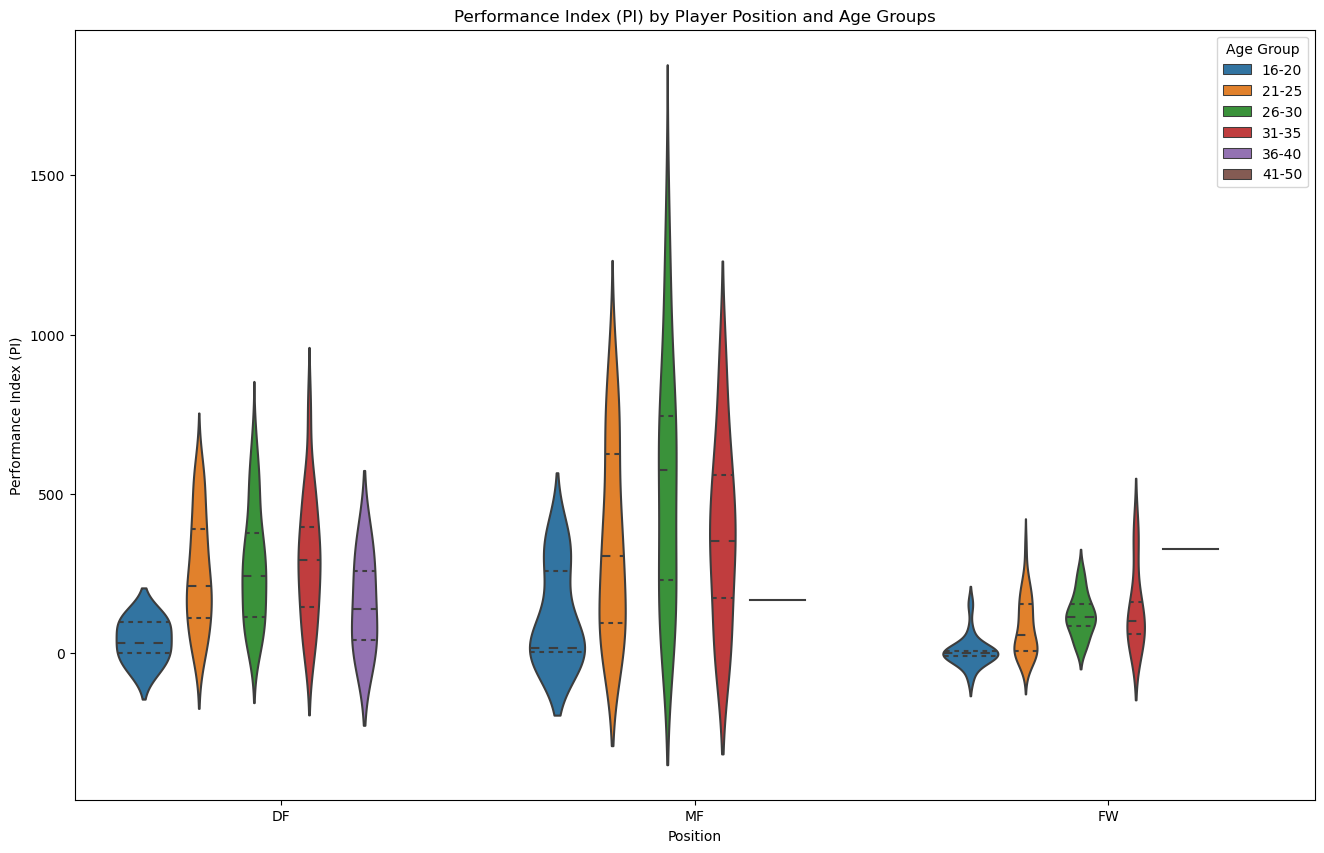

In [10]:
data['Age'] = data['Age'].astype(str)  
data['Years'] = data['Age'].str.split('-', expand=True)[0].astype(int)  

# Define age groups
bins = [16, 20, 25, 30, 35, 40, 50]
labels = ['16-20', '21-25', '26-30', '31-35', '36-40', '41-50']
data['Age Group'] = pd.cut(data['Years'], bins=bins, labels=labels, right=False)

# filter the data for the main positions only
position_filtered_data = data[data['Pos'].isin(['DF', 'MF', 'FW'])]

# Plot the violin plot
plt.figure(figsize=(16, 10))
sns.violinplot(x='Pos', y='PI', hue='Age Group', data=position_filtered_data, inner="quart")
plt.title('Performance Index (PI) by Player Position and Age Groups')
plt.xlabel('Position')
plt.ylabel('Performance Index (PI)')
plt.legend(title='Age Group')
plt.show()

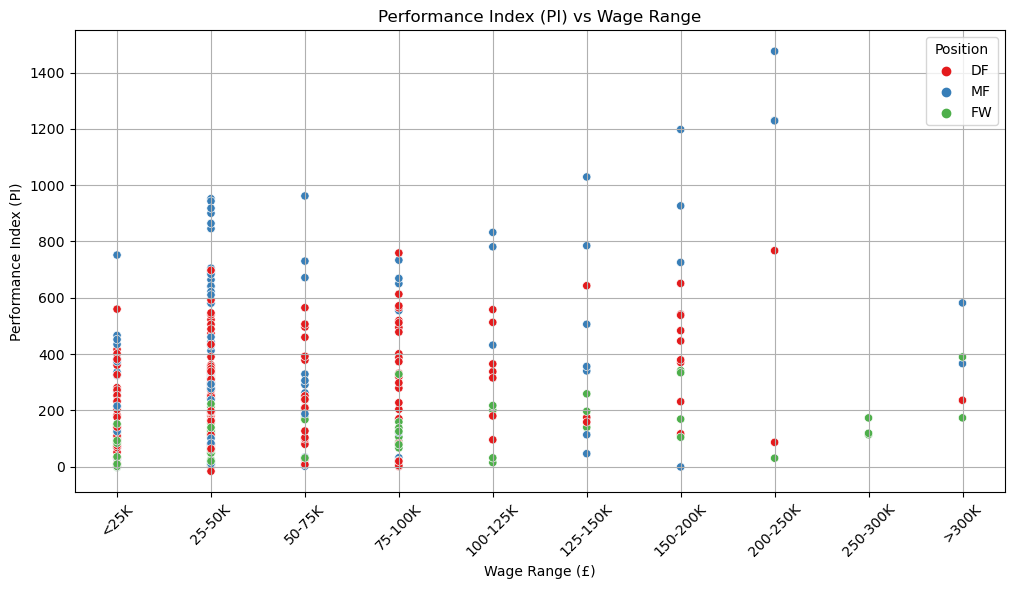

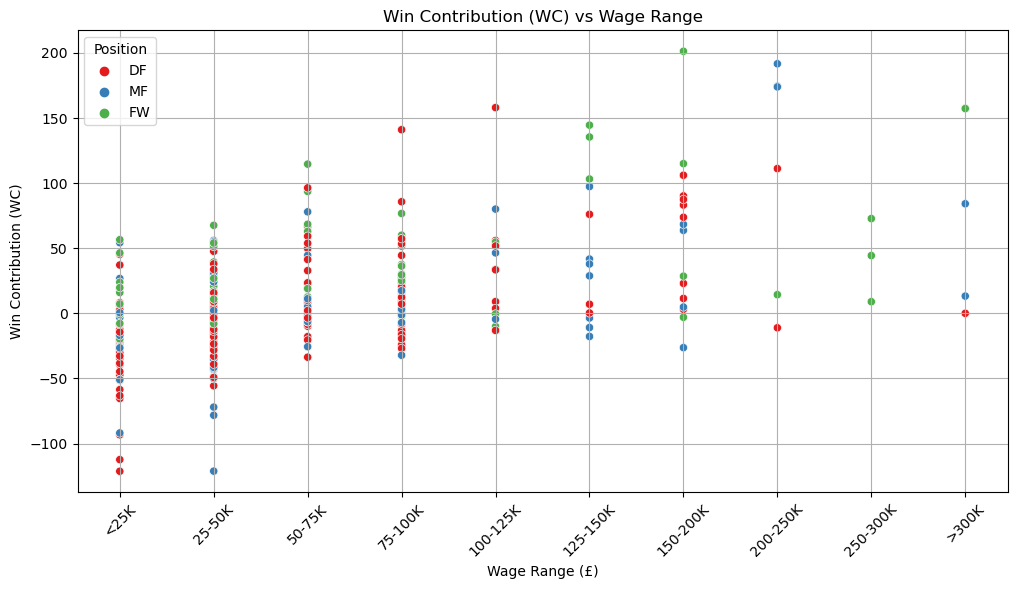

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv('Complete 2023-2024_Premier_League_Player_Stats_and_Wages.csv')

# Clean the 'Weekly Wages' column
data['Weekly Wages Cleaned'] = data['Weekly Wages'].str.extract(r'£ ([\d,]+)').replace({',': ''}, regex=True)
data['Weekly Wages Cleaned'] = pd.to_numeric(data['Weekly Wages Cleaned'], errors='coerce')

# Drop any rows with NaN values in the 'Weekly Wages Cleaned' 
data.dropna(subset=['Weekly Wages Cleaned'], inplace=True)

#wage bin s and labels
wage_bins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 200000, 250000, 300000, np.inf]
wage_labels = ['<25K', '25-50K', '50-75K', '75-100K', '100-125K', '125-150K', '150-200K', '200-250K', '250-300K', '>300K']

# 'Weekly Wages Cleaned' into bins
data['Wage Range'] = pd.cut(data['Weekly Wages Cleaned'], bins=wage_bins, labels=wage_labels, include_lowest=True)

# Filter data by position
position_filtered_data = data[data['Pos'].isin(['DF', 'MF', 'FW'])]

# columns are numeric
columns_to_convert = ['Goals', 'Ast', 'npxG+xAG', 'Progressive Passes', 'Recov', 'TklW', 'Int', 'Aerials Won', '+/-', 'On-Off', 'xG+/-']
for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Calculate Performance Index (PI)
data['PI'] = data.apply(calculate_performance_index, axis=1)

# Calculate Win Contribution (WC)
data['WC'] = (
    data['+/-'] * 2 +             # Double weight as it directly affects game outcome
    data['On-Off'] * 1.5 +        # Significant but less so than actual goal difference
    data['xG+/-'] * 1 +           # Reflects expected impact
    (data['Goals'] + data['Ast']) * 3  # Direct scoring contributions
)

# recalculate PI for the filtered data
position_filtered_data = position_filtered_data.assign(PI=data['PI'],WC=data['WC'])

# Plotting Performance Index (PI) vs Wage Range
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Wage Range', y='PI', hue='Pos', data=position_filtered_data, palette='Set1')
plt.title('Performance Index (PI) vs Wage Range')
plt.xlabel('Wage Range (£)')
plt.ylabel('Performance Index (PI)')
plt.xticks(rotation=45)
plt.legend(title='Position')
plt.grid(True)
plt.show()

# Plotting Win Contribution (WC) vs Wage Range
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Wage Range', y='WC', hue='Pos', data=position_filtered_data, palette='Set1')
plt.title('Win Contribution (WC) vs Wage Range')
plt.xlabel('Wage Range (£)')
plt.ylabel('Win Contribution (WC)')
plt.xticks(rotation=45)
plt.legend(title='Position')
plt.grid(True)
plt.show()

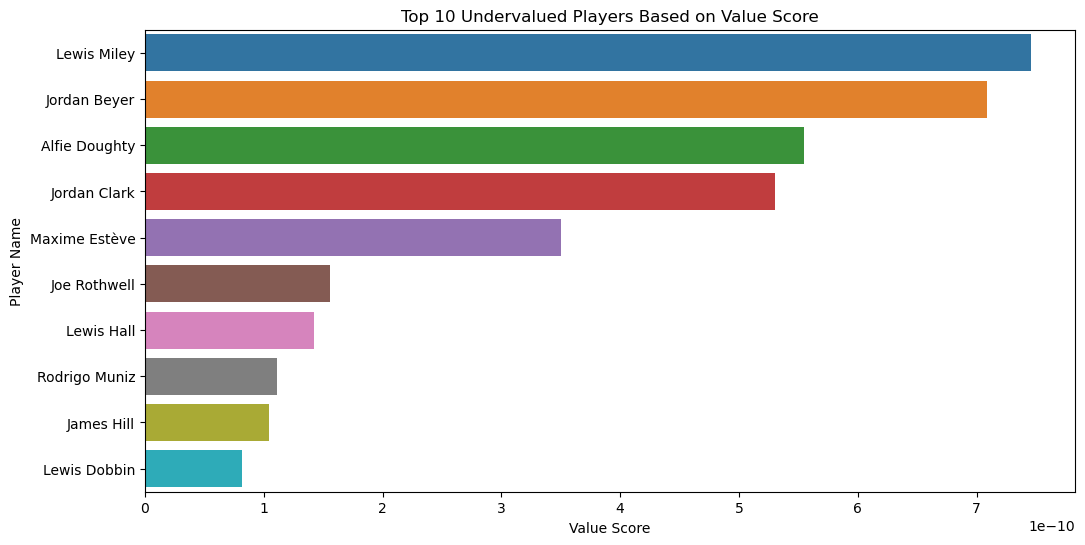

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data['Weekly Wages'] = data['Weekly Wages'].replace('', np.nan).astype(str).str.replace('[^\d.]', '', regex=True)
data['Weekly Wages'] = pd.to_numeric(data['Weekly Wages'], errors='coerce')

# 'Value Score' - PI divided by 'Weekly Wages', handling NaN values from conversion
data['Value Score'] = data['PI'] / data['Weekly Wages']

# Drop rows where 'Value Score' could not be calculated (because of NaNs in 'Weekly Wages')
data = data.dropna(subset=['Value Score'])

# top 10 undervalued players based on 'Value Score'
top_undervalued_players = data.nlargest(10, 'Value Score')

# bar plot of the top 10 undervalued players
plt.figure(figsize=(12, 6))
sns.barplot(x='Value Score', y='Player', data=top_undervalued_players)
plt.title('Top 10 Undervalued Players Based on Value Score')
plt.xlabel('Value Score')
plt.ylabel('Player Name')
plt.show()

In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('Complete 2023-2024_Premier_League_Player_Stats_and_Wages.csv')

# 'Weekly Wages' scaled 
data['Weekly Wages'] = data['Weekly Wages'].str.extract(r'(\d+)')[0].astype(float)
if data['Weekly Wages'].max() < 1000:
    data['Weekly Wages'] *= 1000  

# calculate 'PI' and 'WC'
def calculate_performance_index(row):
    if 'FW' in row['Pos'].split(','):
        return (row['Goals'] * 6 + row['Ast'] * 3 + row['xG+/-90'] * 2 + row['Progressive Passes'] * 2)
    elif 'MF' in row['Pos'].split(','):
        return (row['Goals'] * 5 + row['Ast'] * 4 + row['Progressive Passes'] * 3 + row['Recov'] * 2 + row['TklW'] * 2 + row['xG+/-90'] * 2)
    elif 'DF' in row['Pos'].split(','):
        return (row['TklW'] * 3 + row['Int'] * 3 + row['Progressive Passes'] * 2 + row['Aerials Won'] * 2 + row['xG+/-90'] * 2)
    else:
        return 0

data['PI'] = data.apply(calculate_performance_index, axis=1)
data['WC'] = (data['+/-'] * 2 + data['On-Off'] * 1.5 + data['xG+/-'] * 1 + (data['Goals'] + data['Ast']) * 3)

features = ['Age', 'PPM', 'WC', 'PI', 'Matches Played']
data.dropna(subset=features + ['Weekly Wages'], inplace=True)

# Training the model
X = data[features]
y = data['Weekly Wages']
model = LinearRegression()
model.fit(X, y)

# Function to predict the wage
def predict_wage(player_name):
    player_data = data[data['Player'].str.contains(player_name, case=False, na=False)]
    if not player_data.empty:
        predicted_wage = model.predict(player_data[features])
        return f"The predicted weekly wage for {player_name} is £{predicted_wage[0]:,.2f}"
    else:
        return "Player not found in the dataset."
print(predict_wage('Lewis Miley'))

The predicted weekly wage for Lewis Miley is £33,871.60


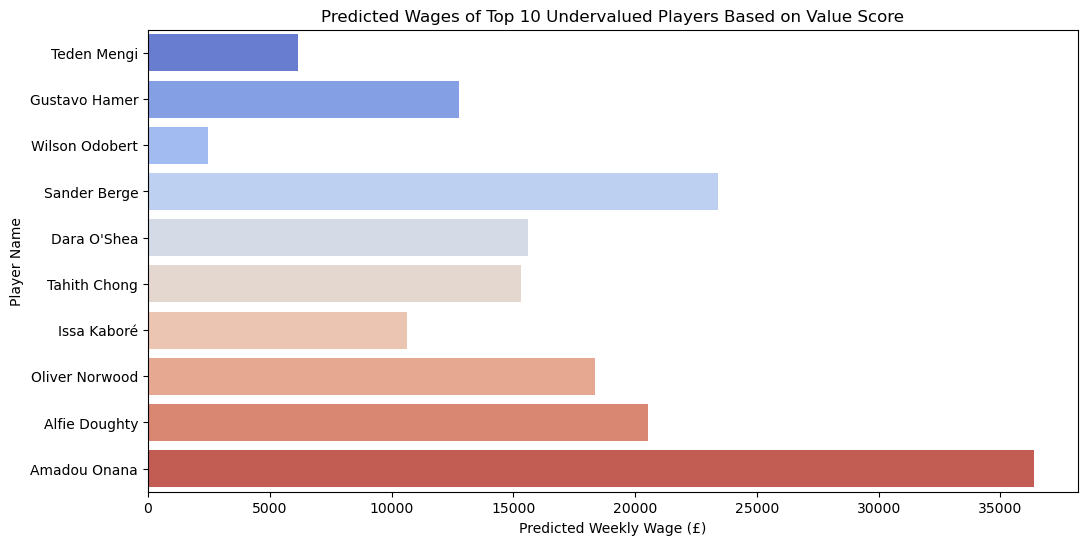

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


data = pd.read_csv('Complete 2023-2024_Premier_League_Player_Stats_and_Wages.csv')

# Clean 'Weekly Wages' - converted to float
data['Weekly Wages'] = data['Weekly Wages'].str.extract(r'(\d+)')[0].astype(float)

def calculate_performance_index(row):
    if 'FW' in row['Pos'].split(','):
        return (row['Goals'] * 6 + row['Ast'] * 3 + row['xG+/-90'] * 2 + row['Progressive Passes'] * 2)
    elif 'MF' in row['Pos'].split(','):
        return (row['Goals'] * 5 + row['Ast'] * 4 + row['Progressive Passes'] * 3 + row['Recov'] * 2 + row['TklW'] * 2 + row['xG+/-90'] * 2)
    elif 'DF' in row['Pos'].split(','):
        return (row['TklW'] * 3 + row['Int'] * 3 + row['Progressive Passes'] * 2 + row['Aerials Won'] * 2 + row['xG+/-90'] * 2)
    else:
        return 0

data['PI'] = data.apply(calculate_performance_index, axis=1)
data['WC'] = (data['+/-'] * 2 + data['On-Off'] * 1.5 + data['xG+/-'] * 1 + (data['Goals'] + data['Ast']) * 3)


# 'Weekly Wages' scaled
data['Weekly Wages'] = data['Weekly Wages'] * 1000

# train the model
features = ['Age', 'PPM', 'WC', 'PI', 'Matches Played']
data.dropna(subset=features + ['Weekly Wages'], inplace=True)
X = data[features]
y = data['Weekly Wages']
model = LinearRegression()
model.fit(X, y)

# Calculate predicted wages
data['Predicted Wage'] = model.predict(data[features])

# 'Value Score' as PI divided by Predicted Wage
data['Value Score'] = data['PI'] / data['Predicted Wage']
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(subset=['Value Score'], inplace=True)

#top 10 undervalued players
top_undervalued_players = data.nlargest(10, 'Value Score')

# bar plot for the predicted wages of these top 10 undervalued players
plt.figure(figsize=(12, 6))
sns.barplot(x='Predicted Wage', y='Player', data=top_undervalued_players, palette='coolwarm')
plt.title('Predicted Wages of Top 10 Undervalued Players Based on Value Score')
plt.xlabel('Predicted Weekly Wage (£)')
plt.ylabel('Player Name')
plt.show()

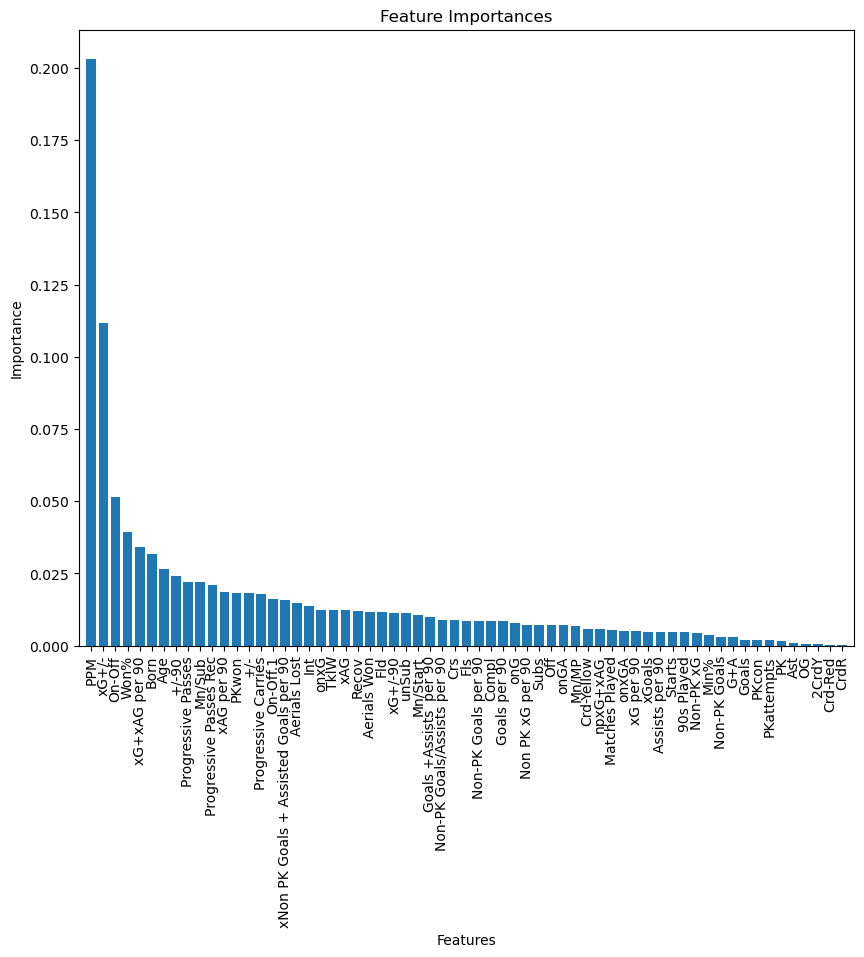

Feature ranking:
1. feature PPM (0.203)
2. feature xG+/- (0.112)
3. feature On-Off (0.051)
4. feature Won% (0.039)
5. feature xG+xAG per 90 (0.034)
6. feature Born (0.032)
7. feature Age (0.027)
8. feature +/-90 (0.024)
9. feature Progressive Passes (0.022)
10. feature Mn/Sub (0.022)
11. feature Progressive Passes Rec (0.021)
12. feature xAG per 90 (0.019)
13. feature PKwon (0.018)
14. feature +/- (0.018)
15. feature Progressive Carries (0.018)
16. feature On-Off.1 (0.016)
17. feature xNon PK Goals + Assisted Goals per 90 (0.016)
18. feature Aerials Lost (0.015)
19. feature Int (0.014)
20. feature onxG (0.012)
21. feature TklW (0.012)
22. feature xAG (0.012)
23. feature Recov (0.012)
24. feature Aerials Won (0.012)
25. feature Fld (0.012)
26. feature xG+/-90 (0.011)
27. feature unSub (0.011)
28. feature Mn/Start (0.010)
29. feature Goals +Assists  per 90 (0.010)
30. feature Non-PK Goals/Assists per 90 (0.009)
31. feature Crs (0.009)
32. feature Fls (0.009)
33. feature Non-PK Goals per 

In [15]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load your dataset
data = pd.read_csv('Complete 2023-2024_Premier_League_Player_Stats_and_Wages.csv')
data.dropna(inplace=True)
data['Weekly Wages'] = data['Weekly Wages'].str.extract(r'(\d+)')[0].astype(float)

# Select only numeric columns, automatically dropping non-numeric ones
numeric_features = data.select_dtypes(include=[np.number])

# Now, let's assume 'Weekly Wages' is your target variable
X = numeric_features.drop(['Weekly Wages'], axis=1)
y = numeric_features['Weekly Wages']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit RandomForest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Print feature rankings
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {X.columns[indices[f]]} ({importances[indices[f]]:.3f})")

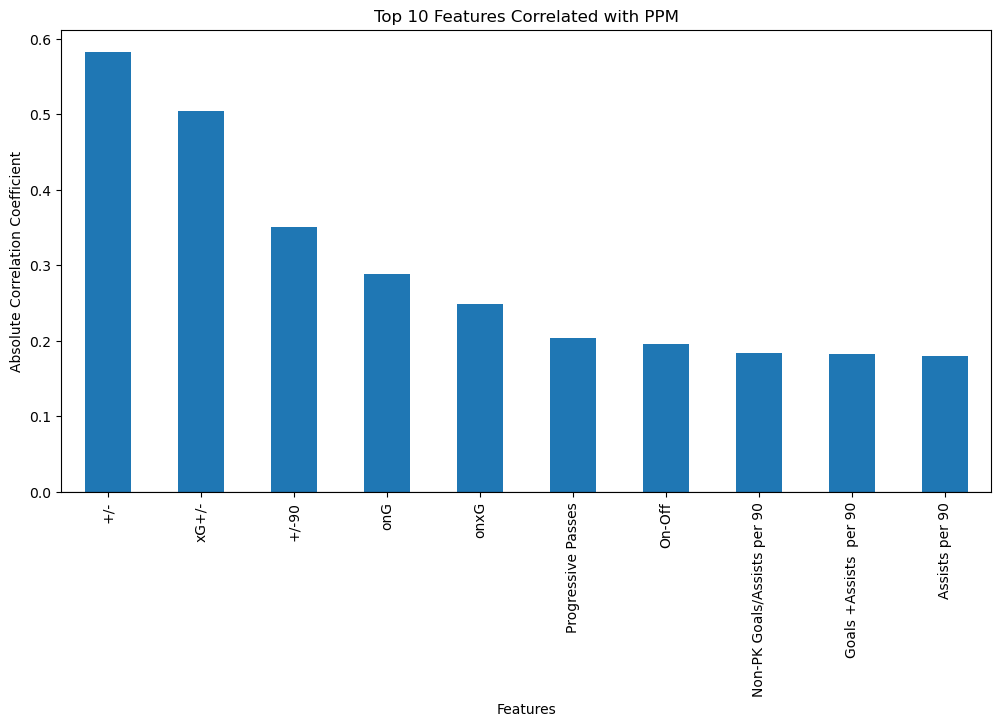

In [16]:
data = pd.read_csv('Complete 2023-2024_Premier_League_Player_Stats_and_Wages.csv')

numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Isolate the PPM correlations, sort them, and take the top 10
top_features = corr_matrix['PPM'].drop('PPM').abs().sort_values(ascending=False).head(10)

# Plotting
plt.figure(figsize=(12, 6))
top_features.plot(kind='bar')
plt.title('Top 10 Features Correlated with PPM')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation Coefficient')
plt.axhline(0, color='black', linewidth=0.8)  # Adds a line at y=0 for reference
plt.show()